## Newton-Raphson for equations
Find the solution for  
\begin{eqnarray}
x_{1}^2+x_{1}x_{2}=10\\
x_{2}+3x_{1}x_{2}^2=57
\end{eqnarray}



### Numerical Solutions
\begin{equation}
f_{i}(x_{1},x_{2},...,x_{N})=0, \qquad i=1,2,....,N
\end{equation}

\begin{equation}
{\bf f(x)}=\left[ \begin{array}{c} f_{1}(\bf{x}) \\ f_{2}(\bf{x})  \end{array}\right] = \left[ \begin{array}{c} x_{1}^2+x_{1}x_{2}-10 \\ x_{2}+3x_{1}x_{2}^2-57 \end{array}\right] =0 
\end{equation}

Make a guess ($x_{1},x_{2}$), and then correct it ($\Delta x_{1},\Delta x_{2}$), we have
\begin{equation}
f_{i}(x_{1}+\Delta x_{1}, x_{2}+\Delta x_{2})=0 \qquad, i=1,2
\end{equation}
We can expand it using Taylor series
\begin{equation}
f_{i}(x_{1}+\Delta x_{1}, x_{2}+\Delta x_{2})\simeq f_{i}(x_{1},x_{2})+\frac{\partial f_{i}}{\partial x_{1}}\Delta x_{1}+\frac{\partial f_{i}}{\partial x_{2}}\Delta x_{2}=0 \qquad i=1,2
\end{equation}

\begin{equation}
\left[ \begin{array}{c} f_{1}\\ f_{2} \end{array}\right] + \begin{bmatrix} \partial f_{1}/\partial x_{1} & \partial f_{1}/\partial x_{2}  \\ \partial f_{2}/\partial x_{1} & \partial f_{2}/\partial x_{2} \end{bmatrix}\left[ \begin{array}{c} \Delta x_{1} \\ \Delta x_{2}  \end{array}\right] =0 
\end{equation}

So we want to solve the matrix equation
\begin{equation}
F'\Delta {\bf{x}}=-\bf{f}
\end{equation}
Here we use bold font for a vector, the captal letter to represent a matrix

For 2x2 array,
\begin{equation}
 \begin{bmatrix} a & b \\c & d \end{bmatrix}\left[ \begin{array}{c} \Delta x_{1} \\ \Delta x_{2}  \end{array}\right] =-\left[ \begin{array}{c} f_{1}\\ f_{2} \end{array}\right] 
\end{equation}
The solution is
\begin{eqnarray}
\Delta x_1=\frac{bf_2-df_1}{ad-bc}\\
\Delta x_2=\frac{cf_1-af_2}{ad-bc}
\end{eqnarray}

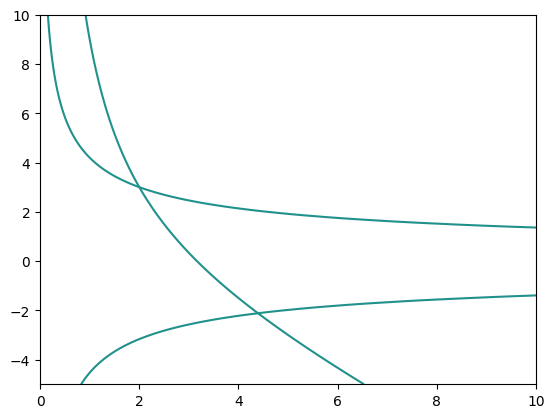

In [46]:
import matplotlib.pyplot as plt
import numpy as np

def f(x,y):
    return x**2+x*y-10

def g(x,y):
    return y+3*x*y**2-57

x = np.linspace(0,10,100)
y = np.linspace(-5,10,100)
X,Y = np.meshgrid(x,y)
Z1 = f(X,Y)
Z2 = g(X,Y)
plt.contour(X,Y,Z1,0)
plt.contour(X,Y,Z2,0)
plt.show()

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def f(x1,x2):
    return np.array([x1**2+x1*x2-10,x2+3*x1*x2**2-57])

def jacobian(x1,x2):
    return np.array([[2*x1+x2,x1],[3*x2**2,1+6*x1*x2]])

def newton_raphson(x1,x2):
    for i in range(10):
        delta=np.linalg.solve(jacobian(x1,x2),-f(x1,x2))
        x1=x1+delta[0]
        x2=x2+delta[1]
        print(x1,x2,delta)

newton_raphson(1,1)

1.1666666666666667 8.5 [0.16666667 7.5       ]
1.5669530414380843 3.6878169961701683 [ 0.40028637 -4.812183  ]
2.0108342331985223 2.8824243460391097 [ 0.44388119 -0.80539265]
1.9991677250643762 3.0022824566444895 [-0.01166651  0.11985811]
1.9999998110162422 3.000000058050752 [ 0.00083209 -0.0022824 ]
2.000000000000006 2.999999999999991 [ 1.88983764e-07 -5.80507612e-08]
2.0 2.9999999999999996 [-6.01361779e-15  8.61316438e-15]
1.9999999999999998 3.0 [-1.38642485e-16  4.85248698e-16]
2.0 3.0 [2.51289504e-16 8.66515531e-18]
2.0 3.0 [ 0. -0.]
